In [1]:
from tools.loader import load_model
from tools.utils import cv2img_to_pil
import cv2
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
cropper, detector, reader = load_model(backup_reader=False)

# Cropper

Text(0.5, 1.0, 'Raw input')

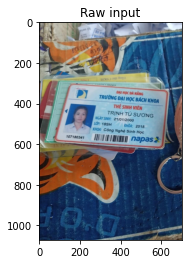

In [16]:
img_path = "./test_img/fb_img/107180341.jpeg"
origin_img = cv2.imread(img_path)
img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Raw input")

Canny
CPU times: user 351 ms, sys: 4.02 ms, total: 355 ms
Wall time: 122 ms


Text(0.5, 1.0, 'Aligned Image')

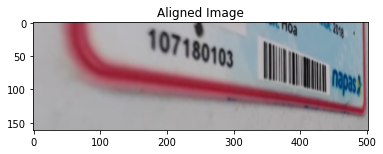

In [15]:
%%time
cropped_img = cropper.predict(origin_img,img_path=None, resize=True)
# cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title("Aligned Image")

# Detector

Time = 0.7946157455444336
CPU times: user 3.12 s, sys: 31.6 ms, total: 3.15 s
Wall time: 907 ms


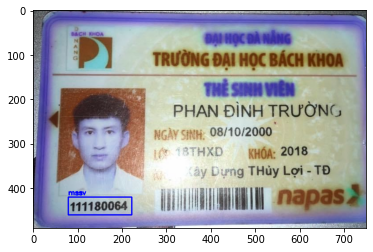

In [17]:
%%time
cropped_img = cv2.imread("./test_img/fb_img/111180064.jpeg")
try:
    id_only_img, annotated_img = detector.predict(cropped_img, True)
    plt.imshow(annotated_img)
except:
    raise Exception("MSSV not found!")

Text(0.5, 1.0, 'MSSV')

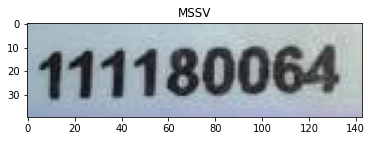

In [18]:
plt.imshow(id_only_img)
plt.title("MSSV")

# Reader

In [19]:
%%time
s = reader.predict(cv2img_to_pil(id_only_img))
s

CPU times: user 414 ms, sys: 7.41 ms, total: 422 ms
Wall time: 214 ms


'111180064'